In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('wines_SPA.csv')

In [3]:
df.shape

(7500, 11)

In [4]:
df.head()

winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0

In [5]:
df.sample(15)

winery                       wine  year  rating  \
2399   Vinedos de Paganos                 El Puntido  2005     4.2   
7034     Bodegas La Horra                  Corimbo I  2015     4.2   
2798             Sei Solo                   Preludio  2016     4.2   
7284     Bodegas La Horra                  Corimbo I  2015     4.2   
1459      Telmo Rodriguez                  Matallana  2016     4.3   
2587               Lustau  Candela Cream Dulce Sweet  N.V.     4.2   
2488   Portal del Priorat      Clos del Portal Somni  2014     4.2   
2163   Portal del Priorat      Clos del Portal Somni  2014     4.2   
571       Dominio de Cair      Pendon De La Aguilera  2010     4.5   
5285             Campillo         Gran Reserva Rioja  2012     4.2   
7105             Imperial              Rioja Reserva  2004     4.2   
3228     Sierra Cantabria          Coleccion Privada  2012     4.2   
1803                Habla                     No. 23  2017     4.3   
371   Pago de Carraovejas                      Tinto  2019     4.5   
7353            Clos Pons                     Roc Nu  2011     4.2   

      num_reviews country              region       price  \
2399          384  Espana               Rioja   73.000000   
7034          412  Espana    Ribera del Duero   37.900000   
2798          388  Espana    Ribera del Duero   31.630000   
7284          412  Espana    Ribera del Duero   37.900000   
1459          128  Espana    Ribera del Duero   39.750000   
2587          405  Espana  Jerez-Xeres-Sherry    7.100000   
2488          404  Espana            Priorato   77.360000   
2163          404  Espana            Priorato   77.360000   
571            47  Espana    Ribera del Duero  299.286841   
5285          410  Espana               Rioja   22.990000   
7105          417  Espana               Rioja   45.000000   
3228          420  Espana               Rioja   28.300000   
1803           26  Espana         Extremadura   23.100000   
371          2144  Espana    Ribera del Duero   33.800000   
7353          420  Espana   Costers del Segre   23.950000   

                      type  body  acidity  
2399             Rioja Red   4.0      3.0  
7034  Ribera Del Duero Red   5.0      3.0  
2798  Ribera Del Duero Red   5.0      3.0  
7284  Ribera Del Duero Red   5.0      3.0  
1459  Ribera Del Duero Red   5.0      3.0  
2587                Sherry   4.0      3.0  
2488           Priorat Red   4.0      3.0  
2163           Priorat Red   4.0      3.0  
571   Ribera Del Duero Red   5.0      3.0  
5285             Rioja Red   4.0      3.0  
7105             Rioja Red   4.0      3.0  
3228             Rioja Red   4.0      3.0  
1803                   Red   4.0      3.0  
371   Ribera Del Duero Red   5.0      3.0  
7353                   Red   4.0      3.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [7]:
df['year']=df['year'].replace('N.V.', pd.NA)
df['year']=df['year'].fillna(df['year'].mode()[0])
df['year']=df['year'].astype(int)

In [8]:
df.isnull().sum()

winery            0
wine              0
year              0
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [9]:
df.describe()

year       rating   num_reviews        price         body  \
count  7500.000000  7500.000000   7500.000000  7500.000000  6331.000000   
mean   2013.399333     4.254933    451.109067    60.095822     4.158427   
std       6.821921     0.118029    723.001856   150.356676     0.583352   
min    1910.000000     4.200000     25.000000     4.990000     2.000000   
25%    2011.000000     4.200000    389.000000    18.900000     4.000000   
50%    2015.000000     4.200000    404.000000    28.530000     4.000000   
75%    2017.000000     4.200000    415.000000    51.350000     5.000000   
max    2021.000000     4.900000  32624.000000  3119.080000     5.000000   

           acidity  
count  6331.000000  
mean      2.946612  
std       0.248202  
min       1.000000  
25%       3.000000  
50%       3.000000  
75%       3.000000  
max       3.000000

In [10]:
df.duplicated().sum()

np.int64(5452)

In [11]:
df=df.drop_duplicates()

In [12]:
df.loc[:,'acidity']=df.groupby('wine')['acidity'].transform(lambda x:x.fillna(x.median()))

In [13]:
df.loc[:,'body']=df.groupby('wine')['body'].transform(lambda x:x.fillna(x.median()))

In [14]:
df.loc[:,'acidity']=df['acidity'].fillna(df['acidity'].mean())

In [15]:
df.loc[:,'body']=df['body'].fillna(df['body'].mean())

In [16]:
df=df.dropna(subset=['year'])

In [17]:
df.loc[:,'type'] = df.groupby('wine')['type'].transform(lambda x:x.fillna(x.mode()))


In [18]:
df=df.dropna(subset=['type'])

In [19]:
df.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [20]:
df = df.drop(columns=['country'])

In [21]:
df['type'].nunique()

21

In [22]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [23]:
df.sample(5)

winery  \
1328        Dominio de Atauta   
314              Vega Sicilia   
567   Marques de la Concordia   
1061           Equipo Navazos   
1680      Bodega Campo Eliseo   

                                                   wine  year  rating  \
1328               Llanos del Almendro Ribera del Duero  2009     4.3   
314                      Unico Reserva Especial Edicion  1982     4.6   
567   Marques de la Concordia VSG Premium (formerly ...  2016     4.5   
1061                    La Bota 90 de Manzanilla Pasada  2011     4.4   
1680                                Campo Eliseo Blanco  2018     4.3   

      num_reviews            region    price  type  body  acidity  
1328          251  Ribera del Duero   107.74    11   5.0      3.0  
314            39  Ribera del Duero  1238.43    11   5.0      3.0  
567            50             Rioja    35.50    12   4.0      3.0  
1061           35        Manzanilla    39.75    15   4.0      3.0  
1680           45             Rueda    27.25    20   3.0      3.0

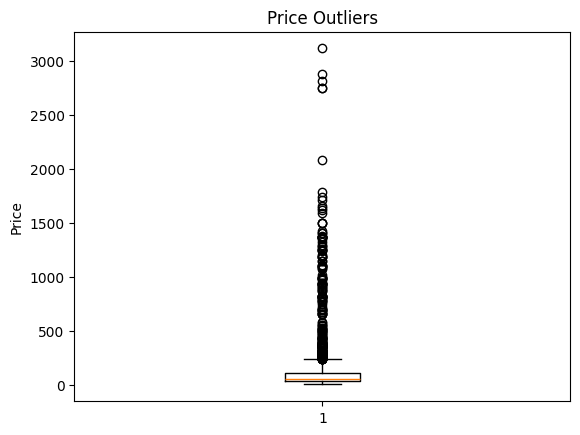

In [24]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.ylabel("Price")
plt.show()

In [25]:
lower_percentile=0.1
upper_percentile=0.9
lower_bound=df['price'].quantile(lower_percentile)
upper_bound=df['price'].quantile(upper_percentile)

In [26]:
df['price']=np.where(df['price']>upper_bound,upper_bound,df['price'])
df['price']=np.where(df['price']<lower_bound,lower_bound,df['price'])

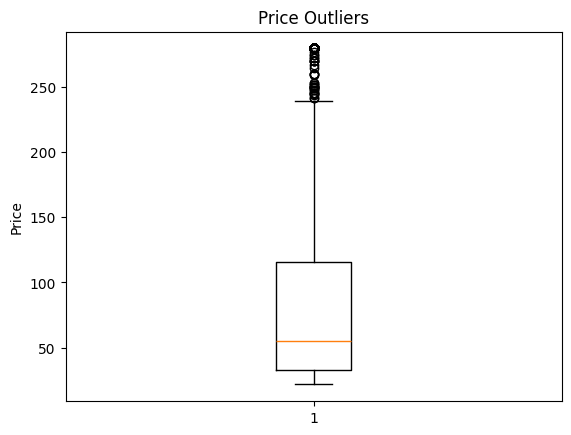

In [27]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.ylabel("Price")
plt.show()

In [28]:
df.sample(15)

winery                             wine  year  rating  \
1655         Altos del Enebro               Finca La Herradura  2014     4.3   
308                    Artadi                    Vina El Pison  2017     4.6   
1507                   Losada                  Altos de Losada  2019     4.3   
569                  Penafiel      Alba de Miros Rueda Verdejo  2019     4.5   
1005                  Pujanza                      Rioja Cisma  2014     4.4   
253                   Allende                            Aurus  2005     4.6   
242                   Cal Pla                  Planots Priorat  2010     4.6   
1373                Remelluri                     Rioja Blanco  2014     4.3   
416                       Lan             Culmen Reserva Rioja  2015     4.5   
1789                    Ysios                        Seleccion  2016     4.3   
784             Alvaro Domecq               1730 Pedro Ximenez  2011     4.4   
472                  Martinet                  Cami Pesseroles  2009     4.5   
291              Vega Sicilia                            Unico  1961     4.6   
1969  Dehesa de Los Canonigos                          Crianza  2017     4.2   
1452       Celler de Capcanes  Flor de Primavera Peraj Ha'abib  2018     4.3   

      num_reviews                    region   price  type  body  acidity  
1655           49          Ribera del Duero   68.00    11   5.0      3.0  
308            41            Vino de Espana  279.68    18   4.0      2.0  
1507           97                    Bierzo   21.60     5   3.0      3.0  
569            49                     Rueda   21.60    20   3.0      3.0  
1005           50                     Rioja  140.00    12   4.0      3.0  
253            95                     Rioja  136.00    12   4.0      3.0  
242           112                  Priorato   87.02     9   4.0      3.0  
1373          196                     Rioja   60.25    13   3.0      3.0  
416           365                     Rioja   42.75    12   4.0      3.0  
1789           28                     Rioja   30.00    12   4.0      3.0  
784           234  Jerez Pedro Ximenes (PX)   39.35    15   4.0      3.0  
472           141                  Priorato  139.30     9   4.0      3.0  
291            50          Ribera del Duero  279.68    11   5.0      3.0  
1969          520          Ribera del Duero   21.60    11   5.0      3.0  
1452          133                  Montsant   27.50     7   4.0      3.0

In [29]:
df.head(25)

winery                            wine  year  rating  \
0         Teso La Monja                           Tinto  2013     4.9   
1                Artadi                   Vina El Pison  2018     4.9   
2          Vega Sicilia                           Unico  2009     4.8   
3          Vega Sicilia                           Unico  1999     4.8   
4          Vega Sicilia                           Unico  1996     4.8   
5          Vega Sicilia                           Unico  1998     4.8   
6          Vega Sicilia                           Unico  2010     4.8   
7          Vega Sicilia                           Unico  1995     4.8   
8          Vega Sicilia  Unico Reserva Especial Edicion  2015     4.8   
9          Vega Sicilia                           Unico  2011     4.8   
10         Vega Sicilia  Unico Reserva Especial Edicion  2016     4.8   
11  Pago de Carraovejas                       El Anejon  2016     4.8   
12         Vega Sicilia  Unico Reserva Especial Edicion  2018     4.8   
13         Vega Sicilia                           Unico  1970     4.8   
14          Toro Albala       Don PX Convento Seleccion  1946     4.8   
15  Pago de Carraovejas           Cuesta de Las Liebres  2015     4.8   
16         Vega Sicilia                           Unico  1962     4.8   
17         Vega Sicilia  Unico Reserva Especial Edicion  2019     4.8   
18      Bodegas El Nido                         El Nido  2018     4.8   
19         Vega Sicilia  Unico Reserva Especial Edicion  2004     4.8   
20           Valdespino                Toneles Moscatel  2011     4.8   
21         Vega Sicilia  Unico Reserva Especial Edicion  2013     4.8   
22    Dominio de Pingus                          Pingus  2016     4.8   
23          Toro Albala       Don PX Convento Seleccion  1931     4.8   
24         Vega Sicilia  Unico Reserva Especial Edicion  2010     4.8   

    num_reviews              region      price  type  body  acidity  
0            58                Toro  279.68000    19   5.0      3.0  
1            31      Vino de Espana  279.68000    18   4.0      2.0  
2          1793    Ribera del Duero  279.68000    11   5.0      3.0  
3          1705    Ribera del Duero  279.68000    11   5.0      3.0  
4          1309    Ribera del Duero  279.68000    11   5.0      3.0  
5          1209    Ribera del Duero  279.68000    11   5.0      3.0  
6          1201    Ribera del Duero  279.68000    11   5.0      3.0  
7           926    Ribera del Duero  279.68000    11   5.0      3.0  
8           643    Ribera del Duero  279.68000    11   5.0      3.0  
9           630    Ribera del Duero  279.68000    11   5.0      3.0  
10          591    Ribera del Duero  279.68000    11   5.0      3.0  
11          454    Ribera del Duero  105.15000    11   5.0      3.0  
12          438    Ribera del Duero  279.68000    11   5.0      3.0  
13          417    Ribera del Duero  279.68000    11   5.0      3.0  
14          398    Montilla-Moriles  279.68000     8   5.0      1.0  
15          372    Ribera del Duero  166.18000    11   5.0      3.0  
16          295    Ribera del Duero  279.68000    11   5.0      3.0  
17          250    Ribera del Duero  279.68000    11   5.0      3.0  
18          217             Jumilla  195.62738    10   4.0      3.0  
19          211    Ribera del Duero  279.68000    11   5.0      3.0  
20          174  Jerez-Xeres-Sherry  253.00000    15   4.0      3.0  
21          172    Ribera del Duero  279.68000    11   5.0      3.0  
22          145    Ribera del Duero  279.68000    11   5.0      3.0  
23          139    Montilla-Moriles  244.85000     8   5.0      1.0  
24          125    Ribera del Duero  279.68000    11   5.0      3.0

In [30]:
pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4e4ddf01c9cda809d2ed354e0ec41e17476035ae93cd2d6e8ae049bb34adef9a
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [31]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df, explorative=True)
profile.to_file("eda_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 22.82it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
df_new=df[['price','rating','year']]

In [33]:
df_new.sample(15)

price  rating  year
516   164.900000     4.5  2016
1406   23.500000     4.3  2019
1381   36.500000     4.3  2014
1747   27.900000     4.3  2018
879    89.900000     4.4  2017
985    43.500000     4.4  2010
1894   22.950000     4.2  2015
165   116.187944     4.6  2017
1928   21.600000     4.2  2018
1055   38.120000     4.4  1996
1050   59.900000     4.4  2012
513    74.000000     4.5  2014
1571   31.500000     4.3  2017
1508   65.250000     4.3  2016
641    37.250000     4.4  2017

In [34]:
df_new['price'].skew()

np.float64(1.350660579447187)

In [35]:
df_new['year'].skew()

np.float64(-3.728591681296665)

In [36]:
df_new['rating'].skew()

np.float64(0.767186404714039)

In [37]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [38]:
pt=PowerTransformer(method='yeo-johnson')
df_new[["rating_transformed","year_transformed"]]=pt.fit_transform(df_new[["rating","year"]])
scaler=StandardScaler()
df_new[["rating_standardized","year_standardized","price"]]=scaler.fit_transform(df_new[["rating_transformed","year_transformed","price"]])

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
<ipython-input-38-38a6f749e4be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[["rating_transformed","year_transformed"]]=pt.fit_transform(df_new[["rating","year"]])
<ipython-input-38-38a6f749e4be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [39]:
df_new.drop(columns=["rating","year","rating_transformed","year_transformed"])

price  rating_standardized  year_standardized
0     2.300707             2.283293           0.137237
1     2.300707             2.283293           0.837964
2     2.300707             2.026307          -0.368631
3     2.300707             2.026307          -1.448340
4     2.300707             2.026307          -1.726873
...        ...                  ...                ...
2046 -0.805214            -1.718563           0.691371
2047 -0.317841            -1.718563          -0.121464
2048 -0.717840            -1.718563           0.548074
2049 -0.214404            -1.718563          -0.830355
6100 -0.748019            -1.718563           0.691371

[1942 rows x 3 columns]

In [46]:
import random
#We divide the table into input and output
X=df_new[['rating_standardized','year_standardized']]
y=df_new['price']
#Splitting into training and testing (80-20 split)
X_train_size=int(0.8*len(X))
#Shuffle dataset indices for randomness
shuffled_indices=list(X.index)
random.shuffle(shuffled_indices)
# Select training and testing indices
X_train_indices=shuffled_indices[:X_train_size]
X_test_indices=shuffled_indices[X_train_size:]
# Create train and test sets
X_train=X.loc[X_train_indices]
X_test=X.loc[X_test_indices]
y_train=y.loc[X_train_indices]
y_test=y.loc[X_test_indices]